In [3]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Embedding(500, 16, input_length = 100))
model.add(layers.LSTM(8))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [6]:
model.summary()
# LSTM 은 작은 셀이 4개가 존재하므로 파라미터 개수가 SimpleRNN에 비해 4배로 증가했음

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 11ms/step - loss: 0.6921 - acc: 0.5529 - val_loss: 0.6905 - val_acc: 0.6034
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6864 - acc: 0.6482 - val_loss: 0.6799 - val_acc: 0.6846
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6464 - acc: 0.7006 - val_loss: 0.6126 - val_acc: 0.7040
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5984 - acc: 0.7135 - val_loss: 0.5887 - val_acc: 0.7178
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5760 - acc: 0.7347 - val_loss: 0.5707 - val_acc: 0.7348
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5570 - acc: 0.7488 - val_loss: 0.5530 - val_acc: 0.7484
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5402 - acc: 0.7595 - val_loss: 0.5419 - val_acc: 0.7592
Epoch 8/100
313/313 [==============================] - 3s 8ms/step 

In [8]:
import matplotlib.pyplot as plt
def plot_model(history):
  plt.plot(history['loss'])
  plt.plot(history['val_loss']) 
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'val']) 
  plt.show() 

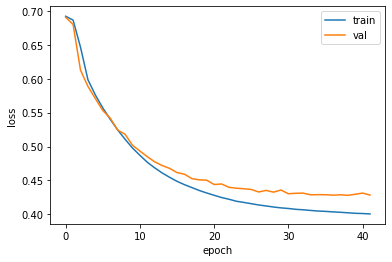

In [9]:
plot_model(history.history)

In [10]:
model2 = keras.Sequential()
model2.add(layers.Embedding(500, 16, input_length = 100))
model2.add(layers.LSTM(8, dropout = 0.3))
model2.add(layers.Dense(1, activation = 'sigmoid'))


In [11]:
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
history = model2.fit(train_seq, train_target, epochs = 100, batch_size= 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6923 - acc: 0.5360 - val_loss: 0.6914 - val_acc: 0.5686
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6898 - acc: 0.5913 - val_loss: 0.6882 - val_acc: 0.6090
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6841 - acc: 0.6309 - val_loss: 0.6796 - val_acc: 0.6298
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6627 - acc: 0.6417 - val_loss: 0.6390 - val_acc: 0.6818
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6064 - acc: 0.7230 - val_loss: 0.5905 - val_acc: 0.7320
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5749 - acc: 0.7416 - val_loss: 0.5653 - val_acc: 0.7432
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5508 - acc: 0.7515 - val_loss: 0.5425 - val_acc: 0.7496
Epoch 8/100
313/313 [==============================] - 3s 9ms/step -

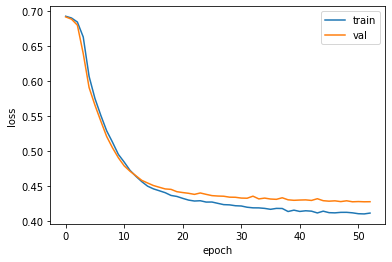

In [12]:
plot_model(history.history)

In [19]:
# 두개의 순환층을 연결할 떈, 앞의 순환층에선 은닉상태도 출력 해 줘야 한다.
model3 = keras.Sequential()
model3.add(layers.Embedding(500, 16, input_length = 100))
model3.add(layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(layers.LSTM(8, dropout = 0.3))
model3.add(layers.Dense(1, activation = 'sigmoid'))

In [16]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [21]:
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
history = model3.fit(train_seq, train_target, epochs = 100, batch_size= 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 15ms/step - loss: 0.6929 - acc: 0.5274 - val_loss: 0.6926 - val_acc: 0.5438
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6914 - acc: 0.5789 - val_loss: 0.6895 - val_acc: 0.6548
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6807 - acc: 0.6399 - val_loss: 0.6637 - val_acc: 0.6824
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6154 - acc: 0.7039 - val_loss: 0.5721 - val_acc: 0.7310
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5603 - acc: 0.7329 - val_loss: 0.5408 - val_acc: 0.7524
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5310 - acc: 0.7519 - val_loss: 0.5129 - val_acc: 0.7624
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5087 - acc: 0.7624 - val_loss: 0.4947 - val_acc: 0.7742
Epoch 8/100
313/313 [==============================] - 4s 13ms

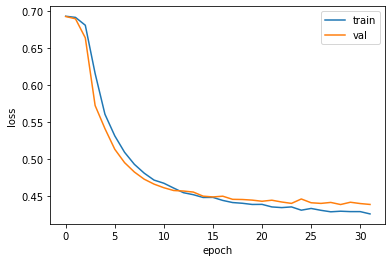

In [22]:
plot_model(history.history)

#GRU